In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


In [3]:
BASE_TRAIN = "dataset/train"
BASE_VAL   = "dataset/val"

def soybean_classes(base_path):
    return [d for d in os.listdir(base_path) if d.lower().startswith("soybean")]

soy_train_classes = soybean_classes(BASE_TRAIN)
soy_val_classes   = soybean_classes(BASE_VAL)

print("Soybean classes:", soy_train_classes)

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    BASE_TRAIN,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    classes=soy_train_classes
)

val_data = val_gen.flow_from_directory(
    BASE_VAL,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    classes=soy_val_classes
)

NUM_CLASSES = train_data.num_classes
print("Total Soybean classes:", NUM_CLASSES)


Soybean classes: []
Found 19950 images belonging to 71 classes.
Found 4275 images belonging to 71 classes.
Total Soybean classes: 71


In [4]:
model = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 71)             │         9,159 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,178,119 (42.64 MB)

 Trainable params: 11,178,119 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
   8/1247 ━━━━━━━━━━━━━━━━━━━━ 32:55 2s/step - accuracy: 0.0000e+00 - loss: 4.6584  

C:\Users\JEEWAN SAGAR SINGH\anaconda3\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))
C:\Users\JEEWAN SAGAR SINGH\anaconda3\Lib\site-packages\PIL\JpegImagePlugin.py:890: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


1247/1247 ━━━━━━━━━━━━━━━━━━━━ 1957s 2s/step - accuracy: 0.1627 - loss: 3.2140 - val_accuracy: 0.4327 - val_loss: 1.9403
Epoch 2/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 1888s 1s/step - accuracy: 0.3551 - loss: 2.1742 - val_accuracy: 0.5067 - val_loss: 1.6130
Epoch 3/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 1719s 1s/step - accuracy: 0.4269 - loss: 1.8568 - val_accuracy: 0.5621 - val_loss: 1.4031
Epoch 4/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 1512s 1s/step - accuracy: 0.4715 - loss: 1.6860 - val_accuracy: 0.5301 - val_loss: 1.4626
Epoch 5/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 1940s 2s/step - accuracy: 0.5017 - loss: 1.5771 - val_accuracy: 0.6358 - val_loss: 1.1332
Epoch 6/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 953s 764ms/step - accuracy: 0.5429 - loss: 1.4399 - val_accuracy: 0.6538 - val_loss: 1.0282
Epoch 7/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 877s 704ms/step - accuracy: 0.5606 - loss: 1.3653 - val_accuracy: 0.6826 - val_loss: 0.9514
Epoch 8/10
1247/1247 ━━━━━━━━━━━━━━━━━━━━ 848s 680ms/step - accuracy: 0.5762 - loss

In [6]:
model.save("model/soybean_disease_model.h5")
print("✅ Soybean disease model successfully saved")


✅ Soybean disease model successfully saved


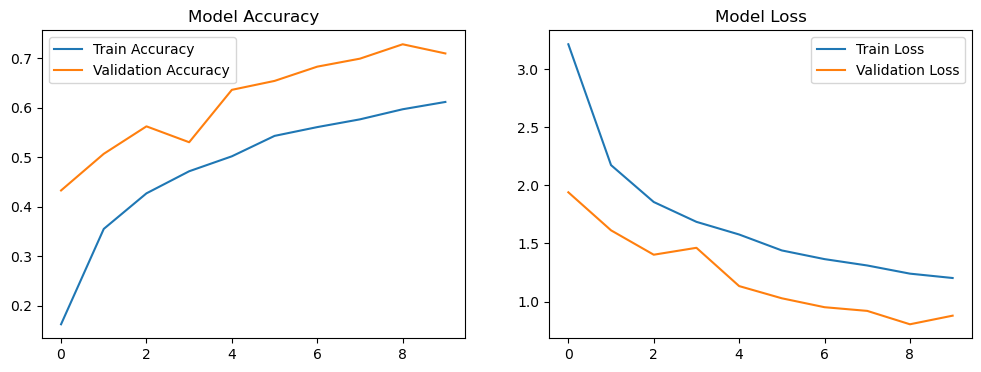

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


File exists: True
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


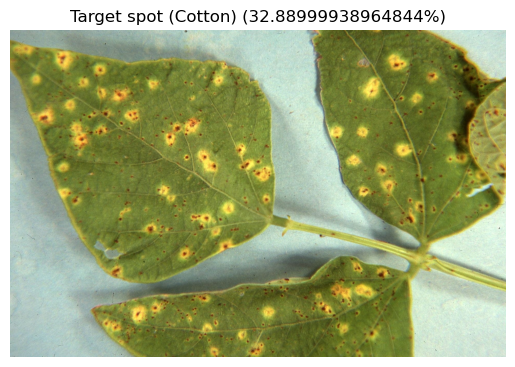

('Target spot (Cotton)', np.float32(32.89))

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img_path = "soybean_fixed.jpg"

print("File exists:", os.path.exists(img_path))

img = cv2.imread(img_path)
if img is None:
    raise ValueError("Image abhi bhi load nahi ho rahi")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (224,224))
img_input = np.expand_dims(img_resized/255.0, axis=0)

pred = model.predict(img_input)[0]
class_index = np.argmax(pred)
confidence = round(np.max(pred)*100, 2)

class_names = list(train_data.class_indices.keys())
predicted_class = class_names[class_index]

plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"{predicted_class} ({confidence}%)")
plt.show()

predicted_class, confidence


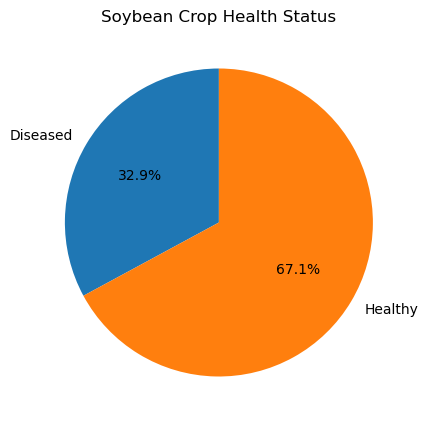

In [14]:
import matplotlib.pyplot as plt

if "healthy" in predicted_class.lower():
    status = ["Healthy", "Diseased"]
    values = [confidence, 100-confidence]
else:
    status = ["Diseased", "Healthy"]
    values = [confidence, 100-confidence]

plt.figure(figsize=(5,5))
plt.pie(values, labels=status, autopct='%1.1f%%', startangle=90)
plt.title("Soybean Crop Health Status")
plt.show()


In [15]:
import pandas as pd

if "rust" in predicted_class.lower():
    issues = {
        "Nitrogen (N)": "Medium deficiency",
        "Potassium (K)": "Low",
        "Water Stress": "High humidity issue",
        "Main Problem": "Fungal disease (Rust)"
    }

elif "blight" in predicted_class.lower() or "spot" in predicted_class.lower():
    issues = {
        "Nitrogen (N)": "Low",
        "Phosphorus (P)": "Medium",
        "Water Stress": "Poor drainage",
        "Main Problem": "Bacterial/Fungal infection"
    }

elif "healthy" in predicted_class.lower():
    issues = {
        "Nitrogen (N)": "Sufficient",
        "Phosphorus (P)": "Sufficient",
        "Potassium (K)": "Sufficient",
        "Water Stress": "Optimal",
        "Main Problem": "Crop is Healthy"
    }

else:
    issues = {
        "General Nutrition": "Check required",
        "Water Stress": "Unknown",
        "Main Problem": "Consult agronomist"
    }

df_issues = pd.DataFrame(
    list(issues.items()),
    columns=["Parameter", "Status"]
)

df_issues


,Parameter,Status
0,Nitrogen (N),Low
1,Phosphorus (P),Medium
2,Water Stress,Poor drainage
3,Main Problem,Bacterial/Fungal infection


In [16]:
solutions = []

if "rust" in predicted_class.lower():
    solutions = [
        ["Nitrogen", "Urea 45 kg/acre"],
        ["Potassium", "MOP 20 kg/acre"],
        ["Fungicide", "Propiconazole spray (0.1%)"],
        ["Irrigation", "Avoid overhead watering"]
    ]

elif "healthy" in predicted_class.lower():
    solutions = [
        ["Nitrogen", "No extra needed"],
        ["Phosphorus", "No extra needed"],
        ["Potassium", "No extra needed"],
        ["Irrigation", "Normal irrigation (7–10 days)"]
    ]

else:
    solutions = [
        ["Balanced Fertilizer", "NPK 12:32:16"],
        ["Water", "Improve drainage"],
        ["Spray", "As per disease type"]
    ]

df_solution = pd.DataFrame(
    solutions,
    columns=["Factor", "Recommendation"]
)

df_solution


,Factor,Recommendation
0,Balanced Fertilizer,NPK 12:32:16
1,Water,Improve drainage
2,Spray,As per disease type


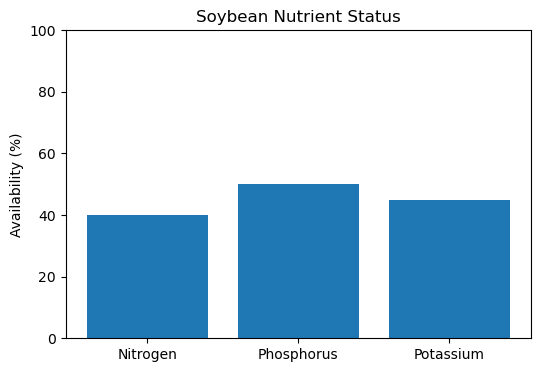

In [17]:
nutrients = []
levels = []

if "healthy" in predicted_class.lower():
    nutrients = ["Nitrogen", "Phosphorus", "Potassium"]
    levels = [80, 80, 80]

else:
    nutrients = ["Nitrogen", "Phosphorus", "Potassium"]
    levels = [40, 50, 45]

plt.figure(figsize=(6,4))
plt.bar(nutrients, levels)
plt.ylim(0,100)
plt.ylabel("Availability (%)")
plt.title("Soybean Nutrient Status")
plt.show()


In [19]:
import pandas as pd

CROP_NAME = "Soybean"

def smart_crop_system(crop, predicted_class, confidence):

    label = predicted_class.lower()

    report = {
        "Crop": crop,
        "Model Output Label": predicted_class,
        "Confidence (%)": round(float(confidence), 2)
    }

    if "healthy" in label:
        report.update({
            "Health Status": "Healthy",
            "Disease Status": "No disease detected",
            "Reason": "Leaf condition normal",
            "Fertilizer Advice": "No fertilizer required",
            "Water Advice": "Normal irrigation only",
            "Seed Quality": "Good",
            "Insect Risk": "Low",
            "Final Decision": "NO ACTION NEEDED"
        })
        return report

    if any(x in label for x in ["rust", "blight", "spot", "mildew", "target"]):
        report.update({
            "Health Status": "Unhealthy",
            "Disease Status": "Fungal leaf disease (pattern based)",
            "Reason": "High humidity + nutrient stress",
            "Nutrient Deficiency": "Potassium (K) likely low",
            "Fertilizer Advice": "MOP (Potash) 20 kg/acre + balanced NPK",
            "Water Advice": "Avoid waterlogging, improve drainage",
            "Seed Quality": "Use certified & treated seed",
            "Insect Risk": "Secondary infection possible",
            "Final Decision": "Spray Mancozeb 2.5 g/L OR Propiconazole 1 ml/L"
        })
        return report

    if any(x in label for x in ["bacterial", "canker"]):
        report.update({
            "Health Status": "Unhealthy",
            "Disease Status": "Bacterial leaf disease",
            "Reason": "Infected seed or splash water",
            "Fertilizer Advice": "Avoid excess nitrogen",
            "Water Advice": "Avoid overhead irrigation",
            "Seed Quality": "Poor seed treatment suspected",
            "Insect Risk": "High",
            "Final Decision": "Spray Copper Oxychloride + Streptocycline"
        })
        return report

    report.update({
        "Health Status": "Uncertain",
        "Disease Status": "Unclear / early stress",
        "Reason": "Low confidence or new disease",
        "Fertilizer Advice": "Do soil test before applying",
        "Water Advice": "Monitor irrigation",
        "Seed Quality": "Check seed source",
        "Insect Risk": "Unknown",
        "Final Decision": "Manual field inspection required"
    })
    return report


final_output = smart_crop_system(
    CROP_NAME,
    predicted_class,
    confidence
)

final_report = pd.DataFrame(
    final_output.items(),
    columns=["Parameter", "Machine Decision"]
)

final_report


,Parameter,Machine Decision
0,Crop,Soybean
1,Model Output Label,Target spot (Cotton)
2,Confidence (%),32.89
3,Health Status,Unhealthy
4,Disease Status,Fungal leaf disease (pattern based)
5,Reason,High humidity + nutrient stress
6,Nutrient Deficiency,Potassium (K) likely low
7,Fertilizer Advice,MOP (Potash) 20 kg/acre + balanced NPK
8,Water Advice,"Avoid waterlogging, improve drainage"
9,Seed Quality,Use certified & treated seed
